Back to the main [Index](../index.ipynb)

The `AbiPy` structure inherits form `pymatgen` structure 
and therefore one has access to all the methods and tools already available in `pymatgen`.
In this notebook, we mainly focus on the extensions added by `AbiPy`. 

In [16]:
from __future__ import division, print_function, unicode_literals

import warnings
warnings.filterwarnings("ignore") # to get rid of deprecation warnings

# Import abipy modules
from abipy import abilab
from abipy.abilab import Structure
import abipy.data as abidata

# Useful tools we'll need later on.
from pprint import pprint
import numpy as np

# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. 
%matplotlib notebook

## Reading a structure from file

You can read a crystalline structure from different file formats: 

   * CIF
   * POSCAR/CONTCAR
   * CHGCAR 
   * LOCPOT,
   * vasprun.xml
   * CSSR 
   * ABINIT Netcdf files 
   * pymatgen's JSON serialized structures

Note, in particular, that one can initialize the structure from any ABINIT Netcdf file 
(`GSR`, `WFK` etc).

In [17]:
# Initialize the structure from one of the CIF files shipped with abipy.
structure = Structure.from_file(abidata.cif_file("si.cif"))
print(structure)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25


To read the structure from a netcdf file:

In [18]:
structure = Structure.from_file(abidata.ref_file("si_nscf_GSR.nc"))
print(structure)

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Si    0     0     0
  1  Si    0.25  0.25  0.25


Use `to_abivars` to get the list of Abinit variables in a python dictionary:

In [19]:
structure.to_abivars()

{'acell': [1.0, 1.0, 1.0],
 'natom': 2,
 'ntypat': 1,
 'rprim': array([[ 6.32850055,  0.        ,  3.6537615 ],
        [ 2.10950018,  5.96656754,  3.6537615 ],
        [ 0.        ,  0.        ,  7.30752299]]),
 'typat': array([1, 1]),
 'xred': array([[ 0.  ,  0.  ,  0.  ],
        [ 0.25,  0.25,  0.25]]),
 'znucl': [14]}

and `abi_string` to get a string that can be used directly in the input file:

In [20]:
print(structure.abi_string)

 natom 2
 ntypat 1
 typat 1 1
 znucl 14
 xred
    0.0000000000    0.0000000000    0.0000000000
    0.2500000000    0.2500000000    0.2500000000
 acell    1.0    1.0    1.0
 rprim
    6.3285005521    0.0000000000    3.6537614973
    2.1095001840    5.9665675402    3.6537614973
    0.0000000000    0.0000000000    7.3075229946


To get a structure from the materials project database 
(https://www.materialsproject.org/)

In [21]:
# You can pass the api_key or set the env variable MAPI_KEY in your bashrc.
print(Structure.from_material_id("mp-149", api_key=None))

Full Formula (Si2)
Reduced Formula: Si
abc   :   3.866975   3.866975   3.866975
angles:  60.000000  60.000000  60.000000
Sites (2)
  #  SP        a      b      c    coordination_no  forces
---  ----  -----  -----  -----  -----------------  ---------------
  0  Si    0.875  0.875  0.875                  5  [0.0, 0.0, 0.0]
  1  Si    0.125  0.125  0.125                  5  [0.0, 0.0, 0.0]


## Converting to other formats

Use `structure.convert(format)` to get the string representation in the new format.

In [22]:
for format in ["cif", "POSCAR"]:
    print((" Abinit --> %s " % format).center(80, "*"))
    s = structure.convert(format=format)
    print(s)

******************************** Abinit --> cif ********************************
# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464
_cell_length_b   3.86697464
_cell_length_c   3.86697464
_cell_angle_alpha   60.00000000
_cell_angle_beta   60.00000000
_cell_angle_gamma   60.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   Si
_chemical_formula_sum   Si2
_cell_volume   40.8882922759
_cell_formula_units_Z   2
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Si  Si1  1  0.000000  0.000000  0.000000  1
  Si  Si2  1  0.250000  0.250000  0.250000  1

****************************** Abinit --> POSCAR *******************************
# generated using pymatgen
data_Si
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   3.86697464

See also `abistruct.py` for a handy command line interface.

In [23]:
!abistruct.py --help

usage: abistruct.py [-h] [-V]
                    {spglib,abispg,convert,supercell,abisanitize,irefine,conventional,neighbors,interpolate,xrd,oxistate,ipython,notebook,kpath,bz,ngkpt,ktables,abikmesh,lgk,kstar,visualize,pmgdata,mp_id,mp_match,mp_search,mp_pd,cod_search,cod_id,animate}
                    ...

optional arguments:
  -h, --help            show this help message and exit
  -V, --version         show program's version number and exit

subcommands:
  Valid subcommands, use command --help for help

  {spglib,abispg,convert,supercell,abisanitize,irefine,conventional,neighbors,interpolate,xrd,oxistate,ipython,notebook,kpath,bz,ngkpt,ktables,abikmesh,lgk,kstar,visualize,pmgdata,mp_id,mp_match,mp_search,mp_pd,cod_search,cod_id,animate}
                        sub-command help
    spglib              Analyze structure with spglib.
    abispg              Extract/Compute Abinit space group from file with
                        structure.
    convert             Convert structure t

## Getting information on the structure

In [24]:
print(structure.reciprocal_lattice)

1.876195 -0.663335 0.000000
0.000000 1.990005 0.000000
-0.938097 -0.663335 1.624832


In [25]:
# List of high-symmetry k-points.
print(structure.hsym_kpoints)

0) [+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000
1) [+0.500, +0.000, +0.500], name: X, weight: 0.000
2) [+0.500, +0.250, +0.750], name: W, weight: 0.000
3) [+0.375, +0.375, +0.750], name: K, weight: 0.000
4) [+0.000, +0.000, +0.000], name: $\Gamma$, weight: 0.000
5) [+0.500, +0.500, +0.500], name: L, weight: 0.000
6) [+0.625, +0.250, +0.625], name: U, weight: 0.000
7) [+0.500, +0.250, +0.750], name: W, weight: 0.000
8) [+0.500, +0.500, +0.500], name: L, weight: 0.000
9) [+0.375, +0.375, +0.750], name: K, weight: 0.000
10) [+0.625, +0.250, +0.625], name: U, weight: 0.000
11) [+0.500, +0.000, +0.500], name: X, weight: 0.000


The method `calc_ksampling` allows one to get an efficient sampling of the Brillouin zone 
by just specifying the number of divisions to be used for the smallest lattice vector of the reciprocal lattice.

In [26]:
pprint(structure.calc_ksampling(nksmall=10))

{'ngkpt': array([10, 10, 10]),
 'shiftk': array([[ 0.5,  0.5,  0.5],
       [ 0.5,  0. ,  0. ],
       [ 0. ,  0.5,  0. ],
       [ 0. ,  0. ,  0.5]])}


To get a possible high symmetry $k$-path in reduced coordinates:

In [27]:
structure.calc_kptbounds()

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.5  ,  0.   ,  0.5  ],
       [ 0.5  ,  0.25 ,  0.75 ],
       [ 0.375,  0.375,  0.75 ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.5  ,  0.5  ,  0.5  ],
       [ 0.625,  0.25 ,  0.625],
       [ 0.5  ,  0.25 ,  0.75 ],
       [ 0.5  ,  0.5  ,  0.5  ],
       [ 0.375,  0.375,  0.75 ],
       [ 0.625,  0.25 ,  0.625],
       [ 0.5  ,  0.   ,  0.5  ]])

To visualize the Brillouin zone with matplotlib:

<IPython.core.display.Javascript object>


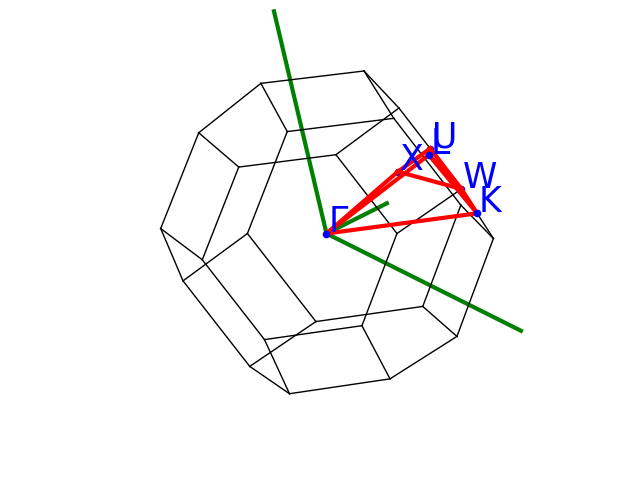

In [28]:
fig = structure.plot_bz()

To get he number of valence electrons for a given set of pseudopotentials: 

In [29]:
structure.num_valence_electrons(pseudos=abidata.pseudos("14si.pspnc"))

8.0